# Polynomial Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

## 2D Polynomial Regression (1 Input column and 1 Output Column )

In [2]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200,1)

# with this we have made a polynomial something like: y = 0.8 * X ^ 2 + 0.9 * X + 2

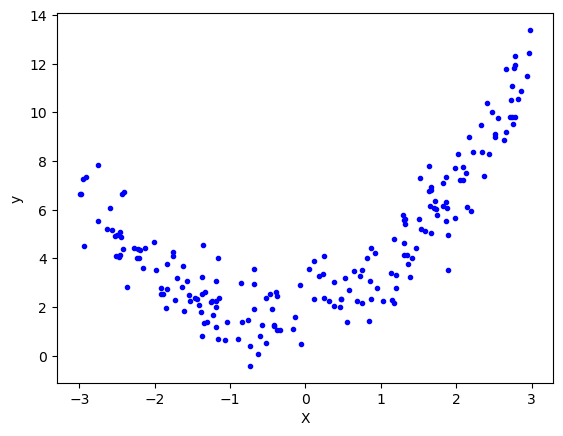

In [3]:
plt.plot(X, y, 'b. ') # this plots points as dots and color Blue
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.4825454991199203

Lets Plot the line that Linear Regression finds as the best fit

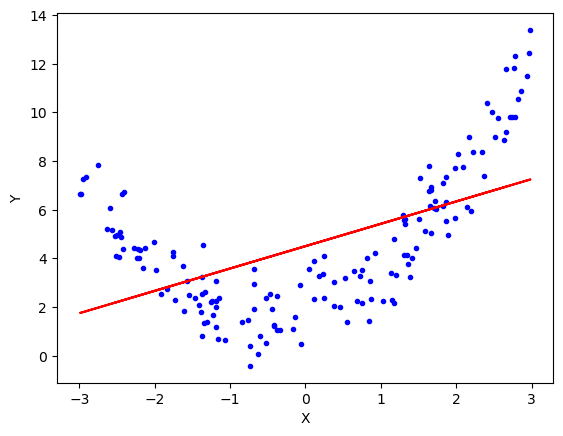

In [5]:
plt.plot(X_train, y_train, "b. ")
plt.plot(X_train, lr.predict(X_train), color = 'r')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

But this is not ideal for the kind of data we have(Quadratic polynomial)

In [6]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree = 2, include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

This will make multiple columns out of the X_train single column based on the degree provided, which will describe feature corresponding to each power of X

In [7]:
print(X_train[0])
print(X_train_trans[0])

[2.65971735]
[1.         2.65971735 7.07409639]


Include_bias parameter - we can remove the component correspinding to X to the power 0, but we will include in this case

In [8]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)

y_pred = lr.predict(X_test_trans)
r2_score(y_test, y_pred)

0.8836514266422882

See how drastically the r2 Score has changed. Lets check the parameters we have here

In [9]:
print(lr.coef_, lr.intercept_)

[[0.         0.84984926 0.87123934]] [1.86976032]


Lets see how the curve looks now

For this we do the following:

1) Make a column vector with 200 values eqaully spaced from -3 to 3 using the linspace function and reshape function.
2) The poly function maps the input features into a new feature space consisting of polynomial combinations of original features.
3) We will use these three input features to predict the ouput.

In [10]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new =  lr.predict(X_new_poly)

### What did we do here

In [11]:
X_new

array([[-3.        ],
       [-2.96984925],
       [-2.93969849],
       [-2.90954774],
       [-2.87939698],
       [-2.84924623],
       [-2.81909548],
       [-2.78894472],
       [-2.75879397],
       [-2.72864322],
       [-2.69849246],
       [-2.66834171],
       [-2.63819095],
       [-2.6080402 ],
       [-2.57788945],
       [-2.54773869],
       [-2.51758794],
       [-2.48743719],
       [-2.45728643],
       [-2.42713568],
       [-2.39698492],
       [-2.36683417],
       [-2.33668342],
       [-2.30653266],
       [-2.27638191],
       [-2.24623116],
       [-2.2160804 ],
       [-2.18592965],
       [-2.15577889],
       [-2.12562814],
       [-2.09547739],
       [-2.06532663],
       [-2.03517588],
       [-2.00502513],
       [-1.97487437],
       [-1.94472362],
       [-1.91457286],
       [-1.88442211],
       [-1.85427136],
       [-1.8241206 ],
       [-1.79396985],
       [-1.7638191 ],
       [-1.73366834],
       [-1.70351759],
       [-1.67336683],
       [-1

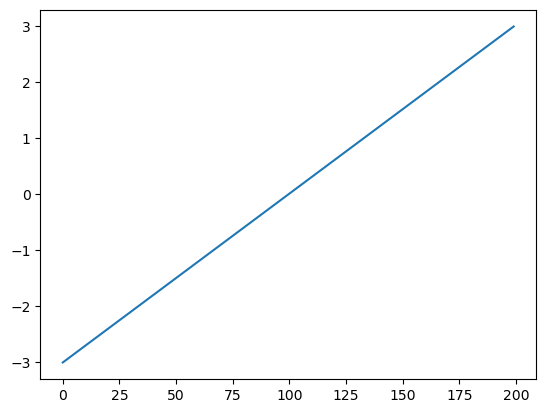

In [12]:
import matplotlib.pyplot as plt

plt.plot(X_new)

Hope the above two make it clear what did we do with the first line

In [13]:
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

This will be difficult to graph as this is already three dimensional.

### Back to Plotting

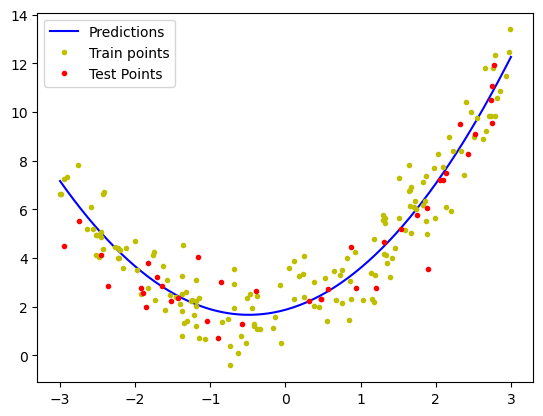

In [14]:
plt.plot(X_new, y_new,'b-', label = 'Predictions')
plt.plot(X_train, y_train, 'y. ', label = 'Train points')
plt.plot(X_test, y_test, 'r. ', label = 'Test Points')
plt.legend()
plt.show()

Note that here we ourselves made a degree 2 function and fit it to degree 2, but in the real world scenario, we are not sure of what the function is like, so we have to test it on various degrees, how degrees affect:

1) If the degree is too low, it will be underfit and bad at predicting data
2) If the degree is too high, it will overfit and the model will be only able to accurately predict on the training data, but will perform horribly on the test data.

Lets create a function for applying all this process in one go

In [17]:
def custom_poly_regressor(degree):
    X_reg_plot = np.linspace(-3, 3, 200).reshape(200,1)

    poly_features = PolynomialFeatures(degree, include_bias=False)

    poly_reg_pipeline = Pipeline([
        ('Poly_features', poly_features),
        ('Std_scaler', StandardScaler()),
        ('LinReg', LinearRegression())
    ])

    poly_reg_pipeline.fit(X, y)

    y_reg_plot = poly_reg_pipeline.predict(X_new)

    plt.plot(X_reg_plot, y_reg_plot, 'b-', label = f"Degree {degree}")
    plt.plot(X_test, y_test, 'y.', label = 'Test data')
    plt.plot(X_train, y_train, 'g.', label = 'Train data')
    plt.legend()

Here is some beatiful code to Visualise this the change with Degrees specified.

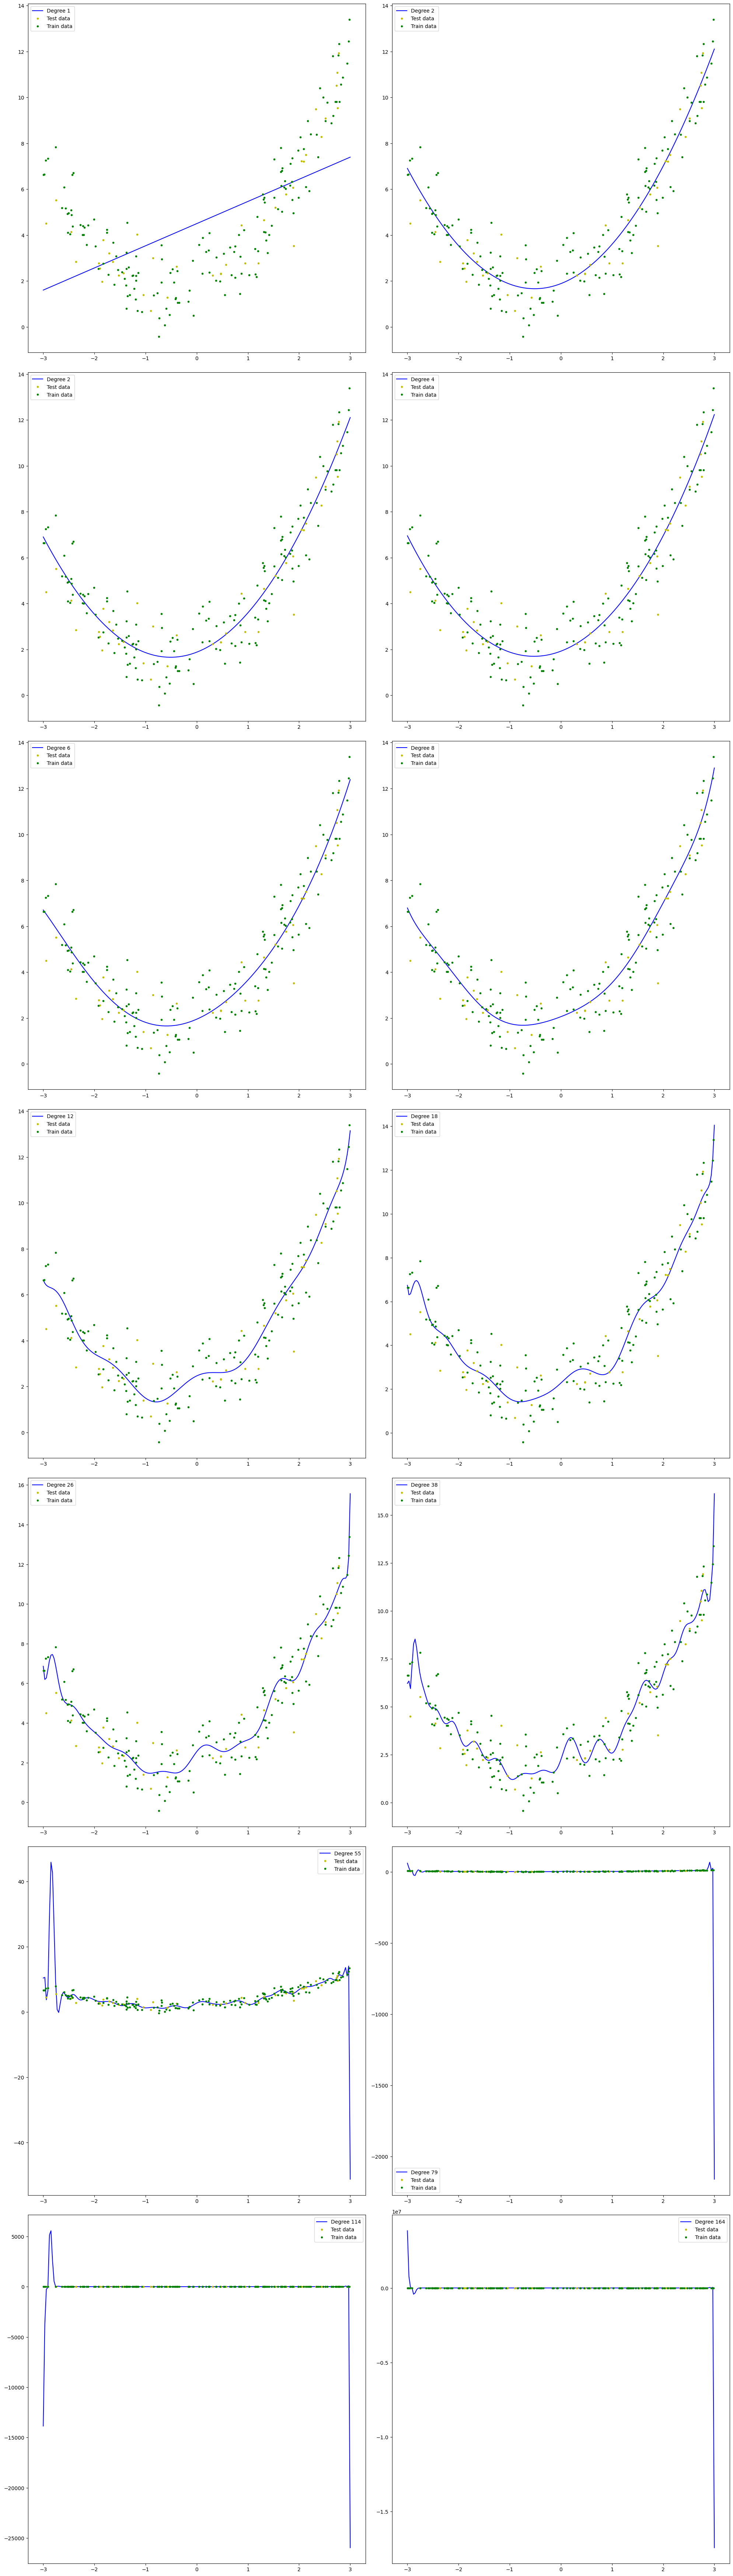

In [44]:
fig, axes = plt.subplots(7, 2, figsize=(20, 70))  # 3x3 grid
i=1
for ax in axes.flatten():
    plt.sca(ax)
    custom_poly_regressor(int((i*1.20)**2))
    i *= 1.20

plt.tight_layout()
plt.show()